In [41]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced visualizations
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # For applying linear regression model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # For model evaluation metrics
import re  # For regular expressions

In [42]:
# Load the dataset (Boston housing prices)
# This dataset contains information about different housing attributes
boston = pd.read_csv('boston_house_prices.csv')


In [43]:
# Convert dataset into a Pandas DataFrame
df = pd.DataFrame(boston)

# Display the first five rows of the dataset
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [44]:
# Column Information and Key Insights
# CRIM: Per capita crime rate by town (higher values indicate higher crime rate).
# ZN: Proportion of residential land zoned for large lots (higher values indicate larger homes).
# INDUS: Proportion of non-retail business acres per town (higher values indicate more industrial areas).
# CHAS: Charles River dummy variable (1 if near river, 0 otherwise).
# NOX: Nitric oxide concentration (higher values indicate more pollution).
# RM: Average number of rooms per dwelling (higher values indicate larger homes).
# AGE: Proportion of owner-occupied units built before 1940 (higher values indicate older houses).
# DIS: Weighted distance to five major employment centers (higher values indicate more distance from job centers).
# RAD: Index of accessibility to radial highways (higher values indicate better accessibility).
# TAX: Property tax rate per $10,000 (higher values indicate higher taxes).
# PTRATIO: Pupil-teacher ratio by town (lower values indicate better education quality).
# B: Proportion of the population that is Black (complex formula: 1000(Bk - 0.63)^2).
# LSTAT: Percentage of lower-status population (higher values indicate lower-income neighborhoods).
# MEDV: Median value of owner-occupied homes in $1000s (target variable).


In [45]:
# Add the target variable for easier access
df['PRICE'] = df['MEDV']
# Remove the old target variable column
df.drop(columns=['MEDV'], inplace=True)

In [46]:
# Display updated dataset
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [47]:
# Check dataset shape (number of rows, columns)
df.shape

(506, 14)

In [48]:
# Get column names
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [49]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [50]:
# Check unique values in each column
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [51]:
# Check for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [52]:
# Display dataset statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [53]:
# Check correlation between variables
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

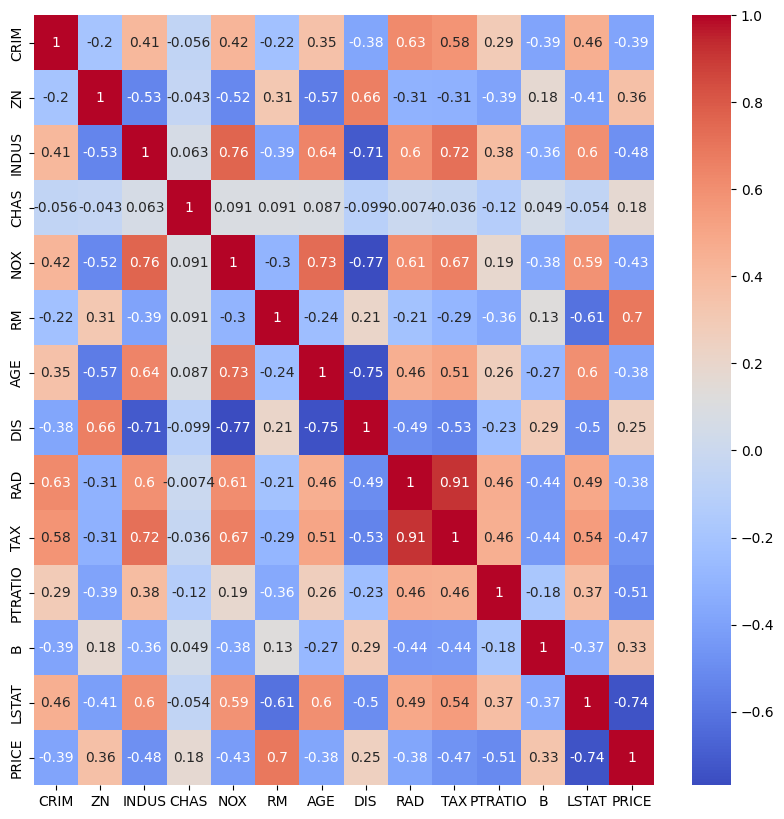

In [54]:
# Plot heatmap to visualize correlations
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

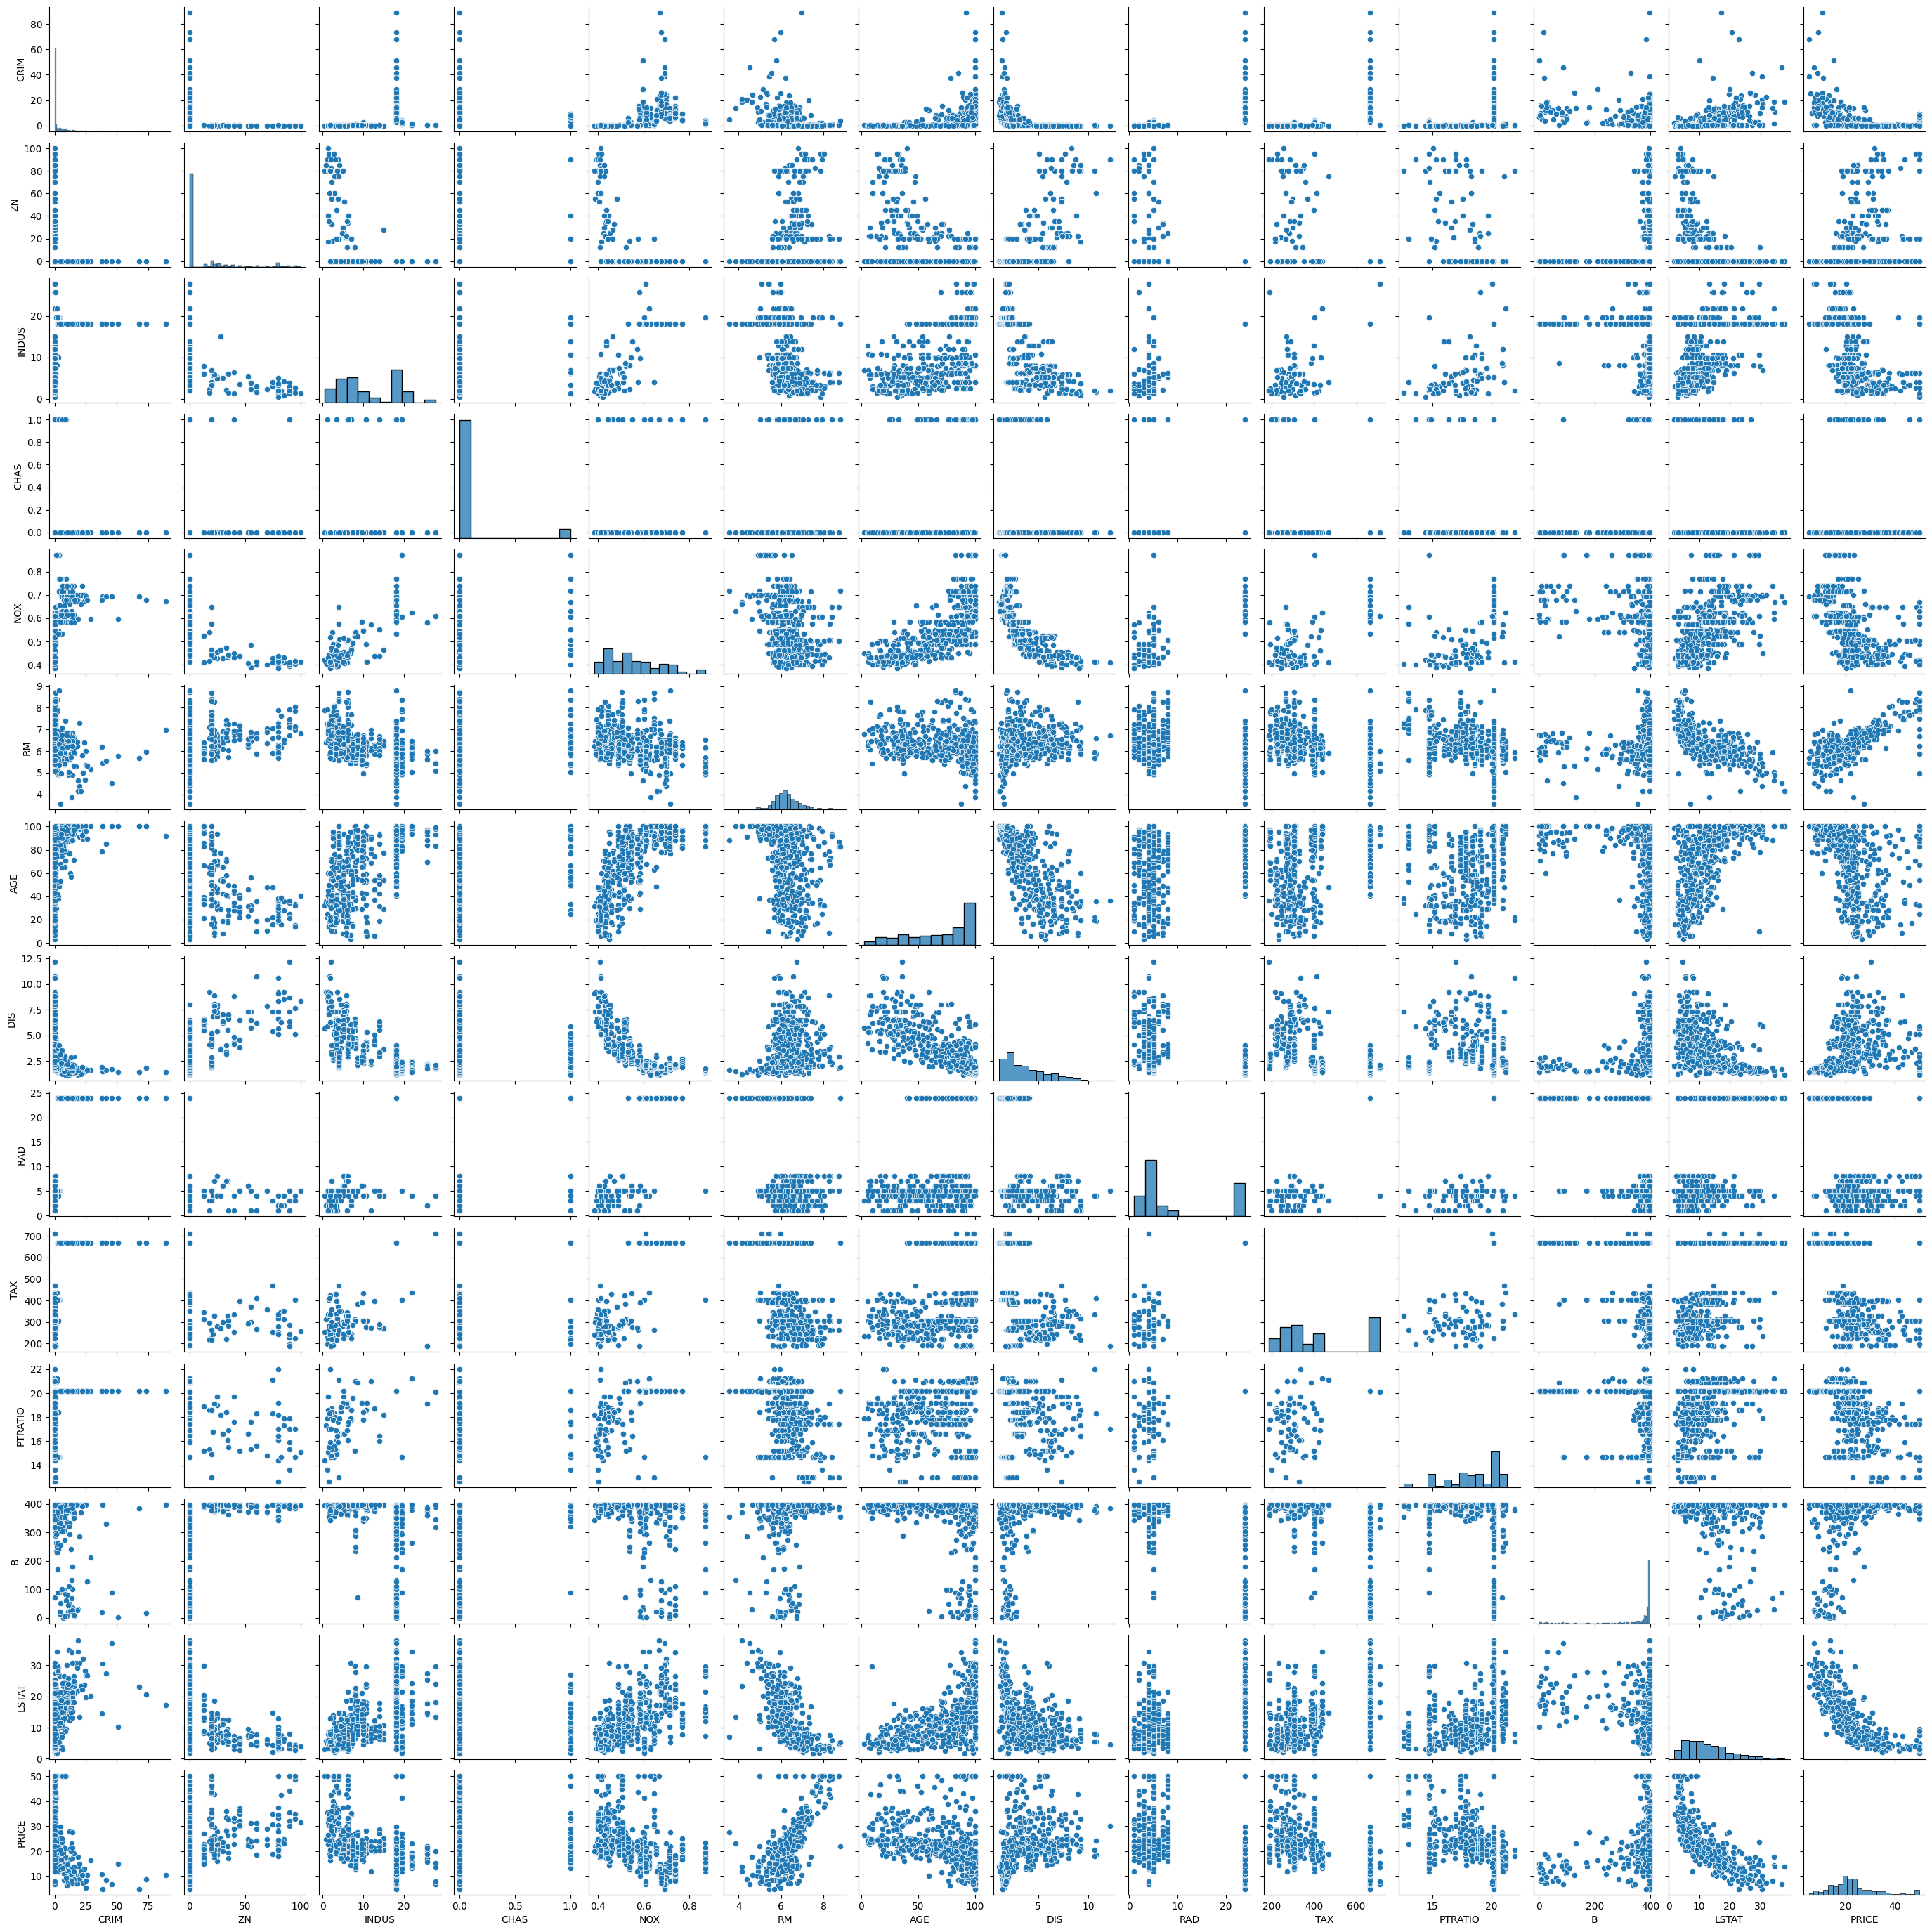

In [55]:
# Pairplot to visualize relationships
sns.pairplot(df, height=2)

<Axes: >

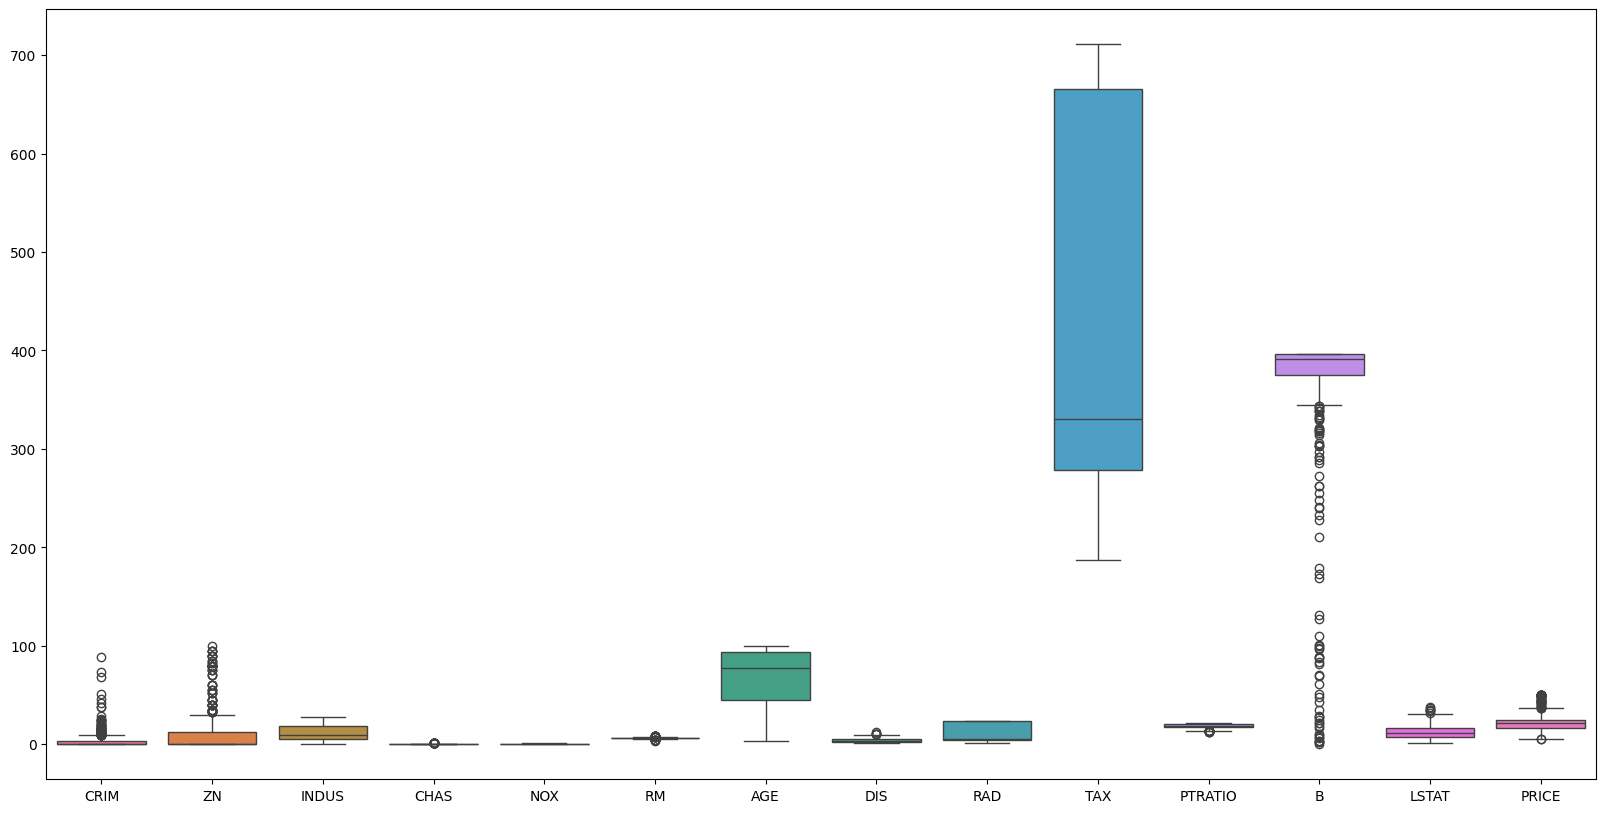

In [56]:
# Boxplot to identify outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)

In [57]:
# Check price range
print("Minimum Price:", df.PRICE.min())
print("Maximum Price:", df.PRICE.max())

Minimum Price: 5.0
Maximum Price: 50.0


In [58]:
# Check standard deviation
print("Standard Deviation of Price:", df.PRICE.std())

Standard Deviation of Price: 9.197104087379818


In [59]:
# Export the cleaned dataset
df.to_csv('boston_dataset.csv', index=False)


In [60]:
# Machine Learning - Linear Regression
# Define feature variables (X) and target variable (y)
X = df.drop(columns=['PRICE'])
y = df['PRICE']

In [61]:
# Convert to numpy arrays
X = np.array(X)
y = np.array(y).reshape(-1, 1)

In [62]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset split sizes
print("Training Data Size:", len(X_train))
print("Testing Data Size:", len(X_test))
print("Training Labels Size:", len(y_train))
print("Testing Labels Size:", len(y_test))

Training Data Size: 404
Testing Data Size: 102
Training Labels Size: 404
Testing Labels Size: 102


In [63]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [30.24675099]
Coefficients: [[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]


In [64]:
# Predict target values using test dataset
y_pred = model.predict(X_test)


In [65]:
# Evaluate model performance
print("R-squared Value:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R-squared Value: 0.6687594935356274
Mean Squared Error: 24.29111947497386
Root Mean Squared Error: 4.928602182665371
Mean Absolute Error: 3.1890919658878847


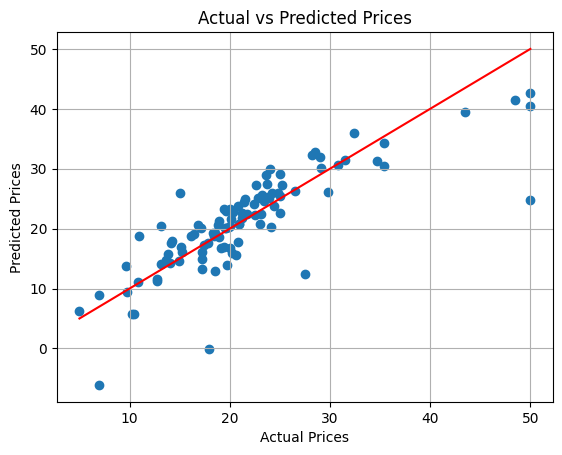

In [66]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
# plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color='red') #Wrong approach here x = y is not correct 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red') # Correct approach to plot the line y = x
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

In [67]:
!pip install klib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Vipul\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [68]:
import klib
from sklearn.datasets import load_diabetes, load_iris

In [69]:
df = pd.DataFrame(load_iris().data)

In [70]:
df.columns = load_iris().feature_names

In [71]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
df['Cat'] = load_iris().target  

In [72]:
# # klib.describe functions for visualizing datasets
# klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features
# klib.corr_mat(df) # returns a color-encoded correlation matrix
# klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations
# klib.corr_interactive_plot(df, split="neg").show() # returns an interactive correlation plot using plotly
# klib.dist_plot(df) # returns a distribution plot for every numeric feature
# klib.missingval_plot(df) # returns a figure containing information about missing values


In [82]:
klib.missingval_plot(df)

No missing values found in the dataset.


In [73]:
klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features

No columns with categorical data were detected.


In [74]:
klib.corr_mat(df) # returns a color-encoded correlation matrix

C:\Users\Vipul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\klib\describe.py:275: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.00,-0.12,0.87,0.82
sepal width (cm),-0.12,1.00,-0.43,-0.37
petal length (cm),0.87,-0.43,1.00,0.96
petal width (cm),0.82,-0.37,0.96,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

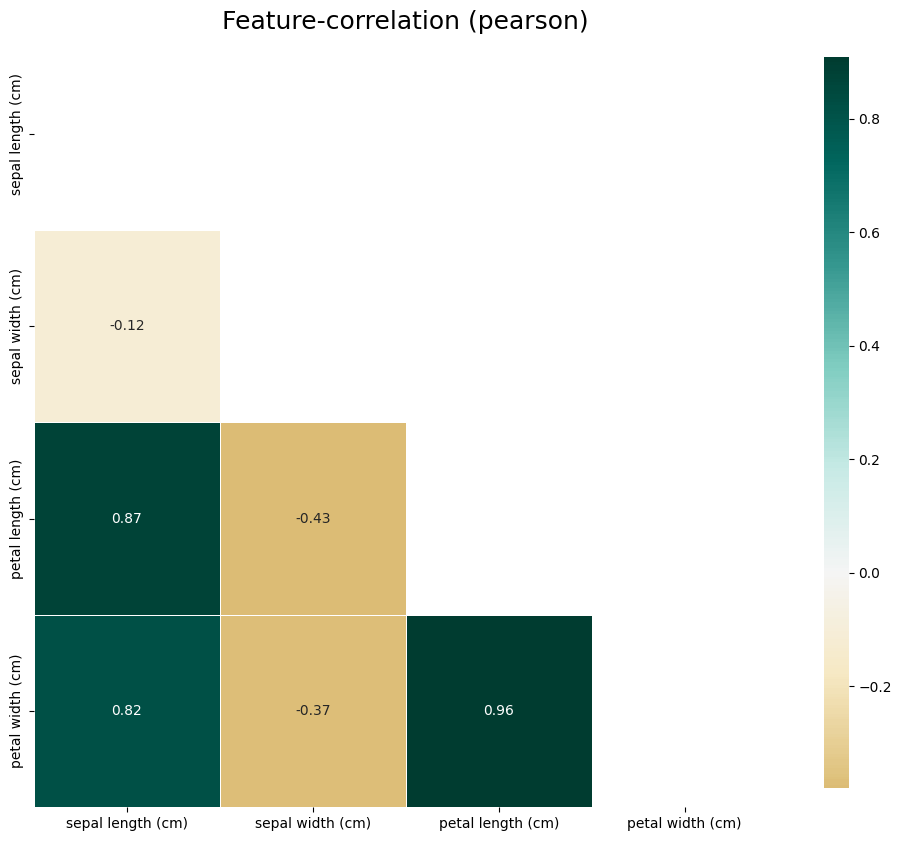

In [75]:
klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations

<Axes: xlabel='petal width (cm)', ylabel='Density'>

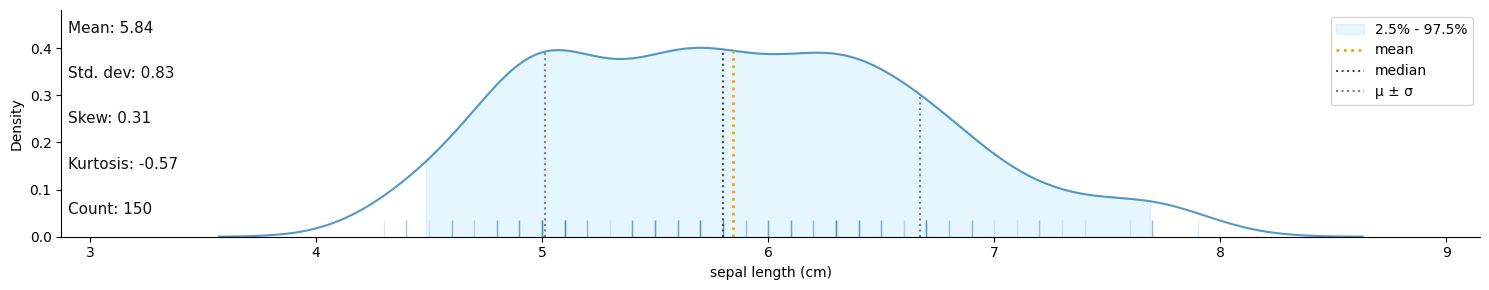

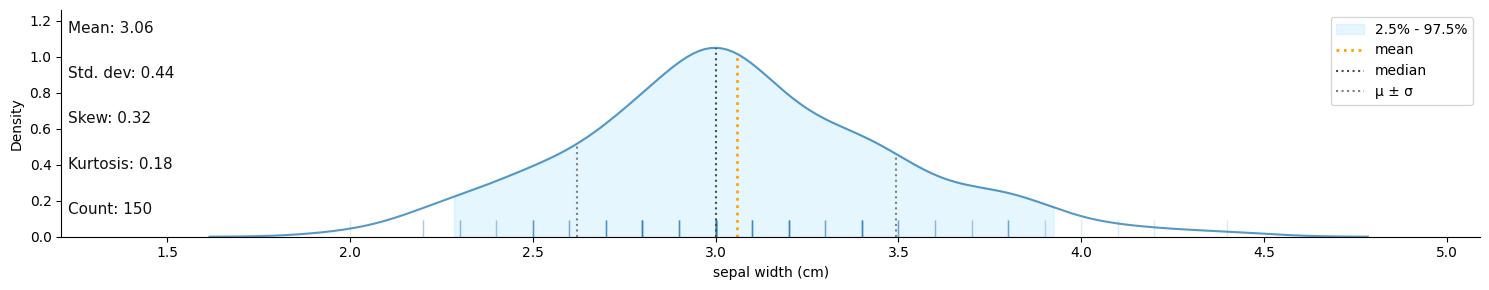

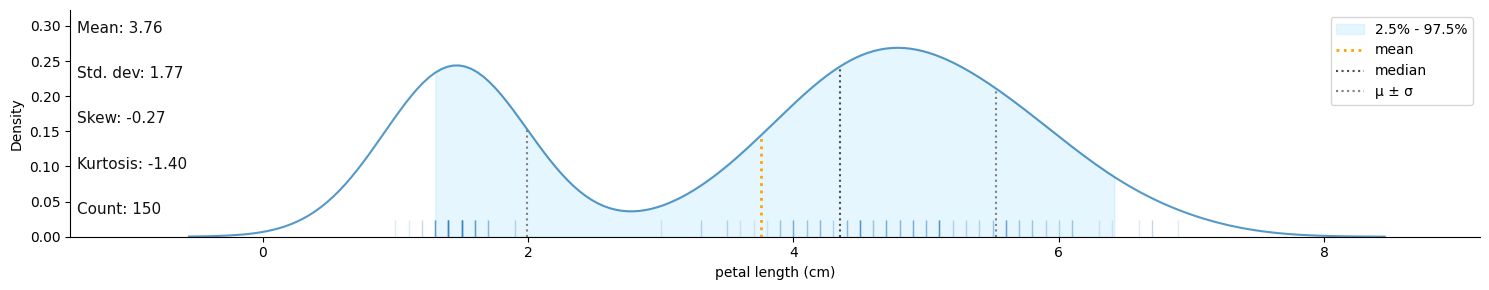

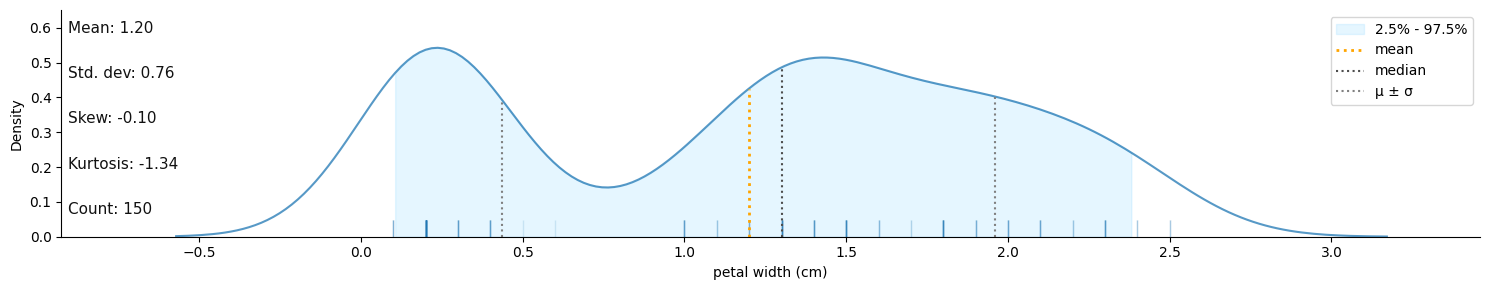

In [81]:
klib.dist_plot(df) # returns a distribution plot for every numeric feature